In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import timedelta
plt.style.use('seaborn')
%matplotlib inline

# Analysis of Cycling Data

## Loading Data

The first dataset is an export of my ride data from [Strava](https://strava.com/), an online social 
network site for cycling and other sports.  This data is a log of every ride since the start of 2018
and contains summary data like the distance and average speed.  It was exported using 
the script `stravaget.py` which uses the stravalib module to read data. Some details of
the fields exported by that script can be seen in [the documentation for stravalib](https://pythonhosted.org/stravalib/api.html#stravalib.model.Activity). 

The exported data is a CSV file so that's easy to read, however the date information in the file is 
recorded in a different timezone (UTC) so we need to do a bit of conversion.  In reading the data I'm
setting the index of the data frame to be the datetime of the ride. 

In [2]:
strava = pd.read_csv('data/strava_export.csv', index_col='date', parse_dates=True)
strava.index = strava.index.tz_convert('Australia/Sydney')
strava.head()

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type
date,,,,,,,,,,
2018-01-03 07:47:51+11:00,100.6,21.0,73.8,False,15.2,94,316.00 m,10,73,Ride
2018-01-04 12:36:53+11:00,NaN,24.0,131.7,False,18.0,52,236.00 m,5,46,Ride
2018-01-04 13:56:00+11:00,83.1,25.0,13.8,False,0.0,3,0.00 m,2,2,Ride
2018-01-04 16:37:04+11:00,110.1,24.0,113.6,False,22.9,77,246.00 m,8,64,Ride
2018-01-06 06:22:46+11:00,110.9,20.0,147.7,True,58.4,189,676.00 m,12,144,Ride


The second dataset comes from an application called [GoldenCheetah](https://www.goldencheetah.org/) which provides
some analytics services over ride data.  This has some of the same fields but adds a lot of analysis of the 
power, speed and heart rate data in each ride.  This data overlaps with the Strava data but doesn't include all 
of the same rides. 

Again we create an index using the datetime for each ride, this time combining two columns in the data (date and time) 
and localising to Sydney so that the times match those for the Strava data. 

In [3]:
cheetah = pd.read_csv('data/cheetah.csv', skipinitialspace=True)
cheetah.index = pd.to_datetime(cheetah['date'] + ' ' + cheetah['time'])
cheetah.index = cheetah.index.tz_localize('Australia/Sydney')
cheetah.head()

,date,time,filename,axPower,aPower Relative Intensity,aBikeScore,Skiba aVI,aPower Response Index,aIsoPower,aIF,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-28 06:39:49+11:00,01/28/18,06:39:49,2018_01_28_06_39_49.json,202.211,0.75452,16.6520,1.31920,1.67755,223.621,0.83441,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-28 07:01:32+11:00,01/28/18,07:01:32,2018_01_28_07_01_32.json,226.039,0.84343,80.2669,1.21137,1.54250,246.185,0.91860,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-02-01 08:13:34+11:00,02/01/18,08:13:34,2018_02_01_08_13_34.json,0.000,0.00000,0.0000,0.00000,0.00000,0.000,0.00000,...,0,0,0,0,0,0,0,0.000,0.00000,0.0000
2018-02-06 08:06:42+11:00,02/06/18,08:06:42,2018_02_06_08_06_42.json,221.672,0.82714,78.8866,1.35775,1.86002,254.409,0.94929,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 17:59:05+11:00,02/07/18,17:59:05,2018_02_07_17_59_05.json,218.211,0.81422,159.4590,1.47188,1.74658,233.780,0.87231,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780


The GoldenCheetah data contains many many variables (columns) and I won't go into all of them here.
Some of the GoldenCheetah parameters are defined [in thier documentation](https://github.com/GoldenCheetah/GoldenCheetah/wiki/UG_Glossary).  

## Combining Data Sets

First, we combine these two data frames using the [`join` method of Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#joining-on-index).   The goal is to keep only those rows of data 
that appear in __both__ data frames so that we have complete data for every row.  

In [4]:
df = strava.join(cheetah)
df.shape

(268, 372)

## Remove MTB Rides

In [5]:
df = df[df["device_watts"] > 0]

## Determining Distribution
Of values:
* time
* distance
* average speed
* average power
* TSS 

According to the generated graphs, we see that speed, power and TTS follow a normal distribution whereas time and distance don't.

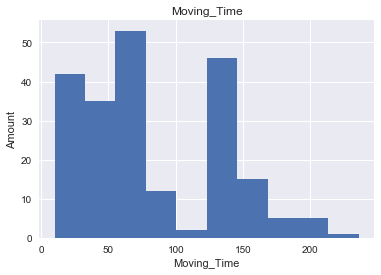

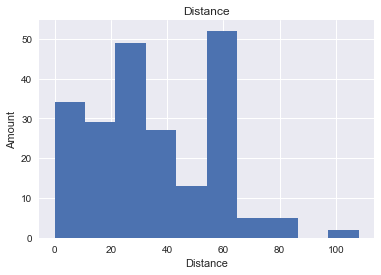

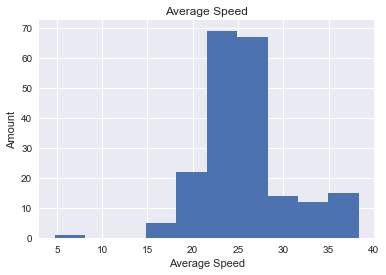

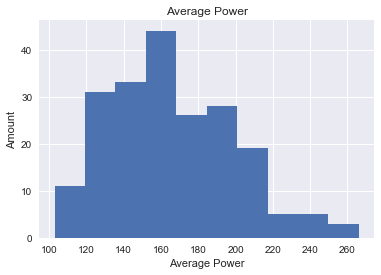

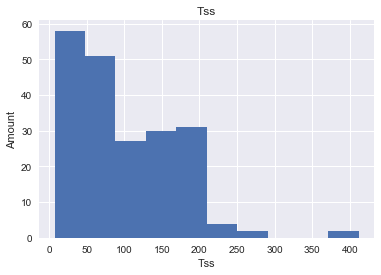

In [6]:
def showHist (item):
    df[item].hist()
    plt.title(item.title())
    plt.xlabel(item.title())
    plt.ylabel('Amount')
    plt.show()
    
for i in ["moving_time","distance","Average Speed","Average Power","TSS"]:
    showHist(i)

## Determining Relationships
For the following variables, any noteable relationships?
* Distance
* Moving Time
* Average Speed
* Heart Rate
* Power (watts)
* Normalised power (NP)
* Training Stress Score
* Elevation Gain

We can see that time and distance are highly correlated, which only makes sense, as naturally, the longer you ride, the furthur you'll get.
Elevation gain seems correlated to distance. The longer you ride, the more hills you'll encounter, which seems to make sense.
There don't seem to be any variables that are anti-correlated (~-1).

In [7]:
smallDF = df[["distance","moving_time","Average Speed","Average Heart Rate","device_watts","NP","aBikeScore","Elevation Gain"]]
corr = smallDF.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,distance,moving_time,Average Speed,Average Heart Rate,NP,aBikeScore,Elevation Gain
distance,1,0.97,0.11,0.15,0.2,0.91,0.8
moving_time,0.97,1,-0.1,0.086,0.092,0.89,0.83
Average Speed,0.11,-0.1,1,0.37,0.51,0.049,-0.078
Average Heart Rate,0.15,0.086,0.37,1,0.27,0.16,0.038
NP,0.2,0.092,0.51,0.27,1,0.43,0.23
aBikeScore,0.91,0.89,0.049,0.16,0.43,1,0.82
Elevation Gain,0.8,0.83,-0.078,0.038,0.23,0.82,1


## Analysis

* Explore the differences between the three categories: `Race`, `Workout` and `Ride`.

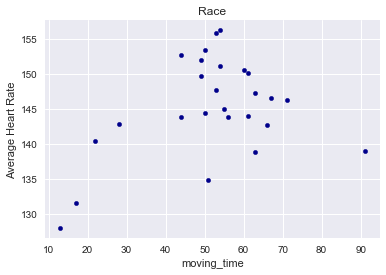

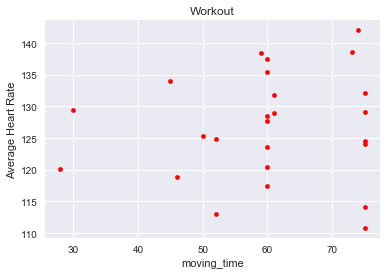

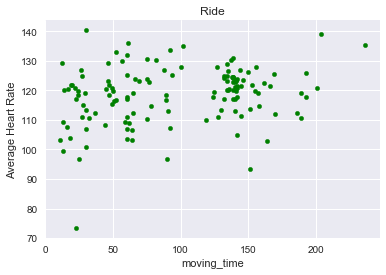

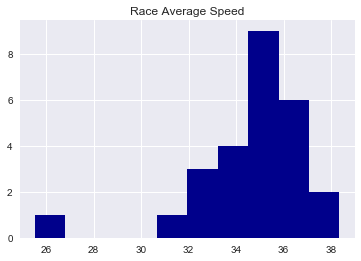

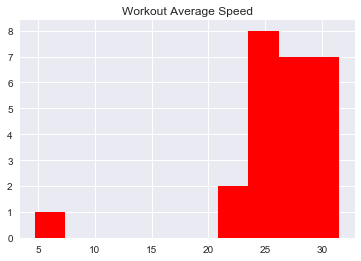

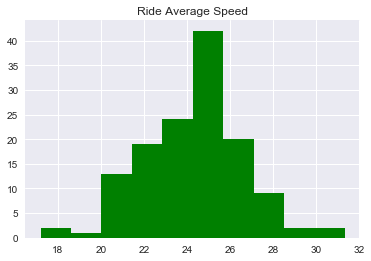

In [8]:
dfRace = df[(df["workout_type"] == "Race") & (df["Average Heart Rate"] > 0)]
dfWork = df[(df["workout_type"] == "Workout") & (df["Average Heart Rate"] > 0)]
dfRide = df[(df["workout_type"] == "Ride") & (df["Average Heart Rate"] > 0)]

dfRace.plot.scatter(x='moving_time', y='Average Heart Rate', c='darkblue', title='Race')
dfWork.plot.scatter(x='moving_time', y='Average Heart Rate', c='red', title='Workout')
dfRide.plot.scatter(x='moving_time', y='Average Heart Rate', c='green', title='Ride'); plt.show()

dfRace["Average Speed"].hist(color='darkblue'); plt.title('Race Average Speed'); plt.show()
dfWork["Average Speed"].hist(color='red'); plt.title('Workout Average Speed'); plt.show()
dfRide["Average Speed"].hist(color='green'); plt.title('Ride Average Speed'); plt.show()

According to the scatter plots, it seems that:
* Races cluster at 1 hour length and have heartrates higher than 130
* Workouts are, on average an hour and heartrates greatly vary
* Rides widly vary in length and heartrates

According to the histogram plots, it seems that:
* Races cluster at 35km/h average speed
* Workouts cluster at 25km/h average speed
* Rides cluster at 25km/h average speed (but vary widly)